# 1. Intro

This kernel explores the UCI Breast Cancer dataset, using a Logistic Regression.  The dataset has 31 features predicting whether a blood cell is diagnosed as 'Malignant' and 'Benign'

# Import Libraries and Read the Dataset

Import the necessary libaries and read in the .csv file

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Datasets/data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Pre-Processing

The "Unnamed: 32" column got added during the importing of data, so we shall drop that from the dataframe, "inplace = True" will perform the operation on the original dataframe itself and not make a copy

In [6]:
df.drop(['Unnamed: 32'], axis = 'columns',inplace=True)

The targets column "diagnosis" is not a numeric column, so we need to encode this column before training our model.

pd.get_dummies() function will create two dummy columns of the needed encoded data, this only works for columns with binary labels, in our case its "M" and "B".  For other cases we will use the OneHotEnoder method from sklearn

In [7]:
dummy = pd.get_dummies(df['diagnosis'])

In [8]:
#Concatenates the new dummy columns to the original dataframe
df = pd.concat((df, dummy), axis = 'columns')

In [9]:
#Re-names the columns that were just concatenated
df.rename(columns={'M':'Malignant', 'B': 'Benign'}, inplace=True)

In [10]:
#We will use "Malignant" as our label column, 1 indicating Breast Cancer positive, and 0 vice versa
df.drop(['diagnosis','Benign'], axis = 'columns',inplace=True)

In [11]:
#Check all of our columns so "label" column is the last column, and all features are of numeric types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Data Preparation for Model Training

In [12]:
X = df.iloc[:, : -1]
Y = df.iloc[:,-1:]

In [13]:
from sklearn.model_selection import train_test_split

#function to separate our inputs and outputs and randomizes their observations
def split_data (features, labels, test_percent):
    X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=test_percent, random_state=42)
    return X_train, X_test, Y_train, Y_test

In [14]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 0.2)

In [15]:
#Show the shape of each split dataframe
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(455, 31)
(455, 1)
(114, 31)
(114, 1)


First convert each of the dataframe objects to numpy arrays of Dtype='float32' then to tensor objects

In [16]:
inputs = X_train.to_numpy(dtype='float32')
targets = Y_train.to_numpy(dtype='float32')

inputs_test = X_test.to_numpy(dtype='float32')
targets_test = Y_test.to_numpy(dtype='float32')

Create two variables to hold the # of rows (n_samples) and # of columns (n_features) to be used later

In [17]:
n_samples, n_features = inputs.shape

### Standardize Features 

We standardize the features by removing the mean and scaling to unit variance (Calculating the Z score).  Centering and scaling happens independently on each feature by computing the relevant statistics on the samples in the training set.  Mean and standard deviation are then stored to be used on later data using 'transform'.

Standardization of a dataset is a common requirement for many ML estimators as they might behave poorly if the individual features do not more or less look like standard normally distributed data (eg. gaussian with 0 mean and unit variance).  This is the case for a Logistic Regressor

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of SVMs or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected 

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
inputs = sc.fit_transform(inputs)
inputs_test = sc.transform(inputs_test)

## Import torch and Convert to tensors

In [19]:
import torch

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

inputs_test = torch.from_numpy(inputs_test)
targets_test = torch.from_numpy(targets_test)

# Logistic Regression Model

We will be using some of the methods from torch's neural network class "torch.nn"  The next function performs the logistic regression and then "squishes" the output values between 0 & 1 using a sigmoid function


In [20]:
import torch.nn as nn

class Model(torch.nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    

In [21]:
def training_loop(n_features, learning_rate, num_epochs,  inputs, targets):
    model = Model(n_features)
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    for epoch in range(num_epochs):
        y_predicted = model(inputs)
        loss = criterion(y_predicted, targets)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if (epoch + 1)% 100 == 0:
            print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')
    with torch.no_grad():
        y_predicted = model(inputs_test)
        y_predicted_cls = y_predicted.round()
        acc = y_predicted_cls.eq(targets_test).sum() / float(targets_test.numel())
        print(f'accuracy: {acc.item():.4f}')
    return y_predicted_cls

In [22]:
# Function Call
y_predicted_cls = training_loop(n_features, 0.01, 1000, inputs, targets)

epoch: 100, loss = 0.2696
epoch: 200, loss = 0.1972
epoch: 300, loss = 0.1661
epoch: 400, loss = 0.1480
epoch: 500, loss = 0.1359
epoch: 600, loss = 0.1272
epoch: 700, loss = 0.1205
epoch: 800, loss = 0.1151
epoch: 900, loss = 0.1107
epoch: 1000, loss = 0.1070
accuracy: 0.9825


## Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [24]:
cf_matrix = confusion_matrix(targets_test.numpy(), y_predicted_cls.numpy())

In [25]:
cf_matrix

array([[70,  1],
       [ 1, 42]])

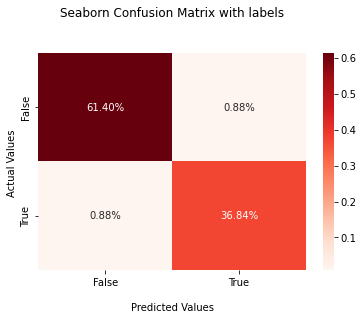

In [26]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Precision and Recall

Precision = TP/(TP+FP)

Recall = TP/(TP + FN)

In [27]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(targets_test.numpy(), y_predicted_cls.numpy())  # == 42/(42+1)
recall = recall_score(targets_test.numpy(), y_predicted_cls.numpy())   # == 42.(42+1)

print(precision, recall)

0.9767441860465116 0.9767441860465116


In this case both the recall and precision are the exact same as there is an even amount of Fale Positives and False Negatives

## ROC Curve

The receiver operating characteristic (ROC) curve plots the true positive rate (recall) against the false positive rate (FPR).  The ROC curve plots sensitivity (recall) versus 1 - specifity

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(targets_test.numpy(), y_predicted_cls.numpy())

In [29]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()

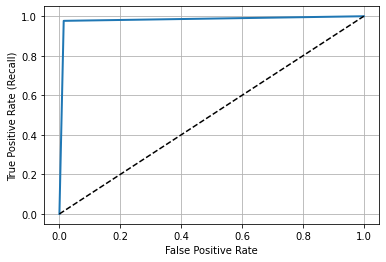

In [30]:
plot_roc_curve(fpr, tpr)
plt.show()